# A 4-Bar Mechanism

The equations to design a 4-bar mechanism are defined with sympy.

The system appears in a paper by A.P. Morgan and C.W. Wampler on
**Solving a Planar Four-Bar Design Using Continuation**, published in
*the Journal of Mechanical Design*, volume 112, pages 544-550, 1990.

The solutions for a straight-line confirmation are shown with matplotlib.

In [1]:
from math import sqrt
from random import uniform

In [2]:
from sympy import var
from sympy.matrices import Matrix

In [3]:
import matplotlib.pyplot as plt

In [4]:
from phcpy.solver import solve

PHCv2.4.88 released 2023-12-26 works!


## 1. Solving a Polynomial System

As `phcpy` is an API, we solve this problem with code defined by several functions. 

In [5]:
def polynomials(d0, d1, d2, d3, d4, a):
    """
    Given in d0, d1, d2, d3, d4 are the coordinates of
    the precision points, given as Matrix objects.
    Also the coordinates of the pivot in a are stored in a Matrix.
    Returns the system of polynomials to design the 4-bar
    mechanism with a coupler passing through the precision points.
    """
    # the four rotation matrices
    c1, s1, c2, s2 = var('c1, s1, c2, s2')
    c3, s3, c4, s4 = var('c3, s3, c4, s4')
    R1 = Matrix([[c1, -s1], [s1, c1]])
    R2 = Matrix([[c2, -s2], [s2, c2]])
    R3 = Matrix([[c3, -s3], [s3, c3]])
    R4 = Matrix([[c4, -s4], [s4, c4]])
    # the first four equations reflecting cos^2(t) + sin^(t) = 1
    p1, p2 = 'c1^2 + s1^2 - 1;', 'c2^2 + s2^2 - 1;'
    p3, p4 = 'c3^2 + s3^2 - 1;', 'c4^2 + s4^2 - 1;'
    # the second four equations on X
    x1, x2 = var('x1, x2')
    X = Matrix([[x1], [x2]])
    c1x = 0.5*(d1.transpose()*d1 - d0.transpose()*d0)
    c2x = 0.5*(d2.transpose()*d2 - d0.transpose()*d0)
    c3x = 0.5*(d3.transpose()*d3 - d0.transpose()*d0)
    c4x = 0.5*(d4.transpose()*d4 - d0.transpose()*d0)
    e1x = (d1.transpose()*R1 - d0.transpose())*X + c1x
    e2x = (d2.transpose()*R2 - d0.transpose())*X + c2x
    e3x = (d3.transpose()*R3 - d0.transpose())*X + c3x
    e4x = (d4.transpose()*R4 - d0.transpose())*X + c4x
    s1, s2 = str(e1x[0]) + ';', str(e2x[0]) + ';'
    s3, s4 = str(e3x[0]) + ';', str(e4x[0]) + ';'
    # the third group of equations on Y
    y1, y2 = var('y1, y2')
    Y = Matrix([[y1], [y2]])
    c1y = c1x - a.transpose()*(d1 - d0)
    c2y = c2x - a.transpose()*(d2 - d0)
    c3y = c3x - a.transpose()*(d3 - d0)
    c4y = c4x - a.transpose()*(d4 - d0)
    e1y = ((d1.transpose() - a.transpose())*R1 \
         - (d0.transpose() - a.transpose()))*Y + c1y
    e2y = ((d2.transpose() - a.transpose())*R2 \
         - (d0.transpose() - a.transpose()))*Y + c2y
    e3y = ((d3.transpose() - a.transpose())*R3 \
         - (d0.transpose() - a.transpose()))*Y + c3y
    e4y = ((d4.transpose() - a.transpose())*R4 \
         - (d0.transpose() - a.transpose()))*Y + c4y
    s5, s6 = str(e1y[0]) + ';', str(e2y[0]) + ';'
    s7, s8 = str(e3y[0]) + ';', str(e4y[0]) + ';'
    return [p1, p2, p3, p4, s1, s2, s3, s4, s5, s6, s7, s8]

Let us generate random points and define the polynomial system.

In [6]:
pt0 = Matrix(2, 1, lambda i,j: uniform(-1,+1))
pt1 = Matrix(2, 1, lambda i,j: uniform(-1,+1))
pt2 = Matrix(2, 1, lambda i,j: uniform(-1,+1))
pt3 = Matrix(2, 1, lambda i,j: uniform(-1,+1))
pt4 = Matrix(2, 1, lambda i,j: uniform(-1,+1))
# the pivot is a
piv = Matrix([[1], [0]])
equ = polynomials(pt0,pt1,pt2,pt3,pt4,piv)
for pol in equ:
    print(pol)

c1^2 + s1^2 - 1;
c2^2 + s2^2 - 1;
c3^2 + s3^2 - 1;
c4^2 + s4^2 - 1;
x1*(0.575780894773708*c1 - 0.442523921641652*s1 - 0.0728585560921786) + x2*(-0.442523921641652*c1 - 0.575780894773708*s1 - 0.371806919116201) + 0.191901152856501;
x1*(0.11644386808672*c2 - 0.0599557693607*s2 - 0.0728585560921786) + x2*(-0.0599557693607*c2 - 0.11644386808672*s2 - 0.371806919116201) - 0.0631974428019436;
x1*(-0.565312487834353*c3 + 0.550290198396262*s3 - 0.0728585560921786) + x2*(0.550290198396262*c3 + 0.565312487834353*s3 - 0.371806919116201) + 0.239424378526973;
x1*(0.131146550760026*c4 + 0.491420944937445*s4 - 0.0728585560921786) + x2*(0.491420944937445*c4 - 0.131146550760026*s4 - 0.371806919116201) + 0.0575726043004729;
y1*(-0.424219105226292*c1 - 0.442523921641652*s1 + 0.927141443907821) + y2*(-0.442523921641652*c1 + 0.424219105226292*s1 - 0.371806919116201) - 0.311021185825029;
y1*(-0.88355613191328*c2 - 0.0599557693607*s2 + 0.927141443907821) + y2*(-0.0599557693607*c2 + 0.88355613191328*s2 - 0.371

The solutions of the polynomial system define a mechanism
of which the coupler passes through the five points.

In [7]:
sols = solve(equ)

In [8]:
len(sols)

36

In [9]:
for (idx, sol) in enumerate(sols):
    print('Solution', idx+1, ':')
    print(sol)

Solution 1 :
t :  1.00000000000000E+00   0.00000000000000E+00
m : 1
the solution for t :
 c1 :  2.99276845460204E-01   5.86444254690849E-01
 s1 :  1.13068329976729E+00  -1.55224001821076E-01
 c2 : -3.86778183499765E-02   2.26739973664286E-01
 s2 : -1.02468936268872E+00  -8.55850351666999E-03
 c3 : -4.06166523983715E-01  -5.83985483273106E-01
 s3 : -1.10548834541418E+00   2.14561605087858E-01
 c4 :  9.91145925896202E-01  -1.22036246627533E-04
 s4 : -1.32780263201668E-01  -9.10946595073657E-04
 x1 :  7.92827143509360E-01   8.15919804882965E-01
 x2 : -3.88212256214321E-01   5.29059930646973E-02
 y1 :  3.37537846818691E-01   5.33495200664158E-01
 y2 :  2.76797946932212E-01   3.70495005424742E-01
== err :  1.530E-14 = rco :  4.619E-03 = res :  2.772E-15 =
Solution 2 :
t :  1.00000000000000E+00   0.00000000000000E+00
m : 1
the solution for t :
 c1 : -1.43487844800511E-01  -4.68167635469220E-97
 s1 :  9.89652079467579E-01   0.00000000000000E+00
 c2 : -5.67833515321219E-01   9.36335270938440E-

Solving a general problem, for random precision points, shows that the number of solutions is 36.

## 2. A Straight-Line Configuration

Let us consider a special problem.

In [10]:
def straight_line(verbose=True):
    """
    This function solves an instance where the five precision
    points lie on a line.  The coordinates are taken from Problem 7
    of the paper by A.P. Morgan and C.W. Wampler.
    Returns a list of solution dictionaries for the real solutions.
    """
    from phcpy.solutions import strsol2dict, is_real
    pt0 = Matrix([[ 0.50], [ 1.06]])
    pt1 = Matrix([[-0.83], [-0.27]])
    pt2 = Matrix([[-0.34], [ 0.22]])
    pt3 = Matrix([[-0.13], [ 0.43]])
    pt4 = Matrix([[ 0.22], [ 0.78]])
    piv = Matrix([[1], [0]])
    equ = polynomials(pt0,pt1,pt2,pt3,pt4,piv)
    if verbose:
        print('the polynomial system :')
        for pol in equ:
            print(pol)
    sols = solve(equ)
    if verbose:
        print('the solutions :')
        for (idx, sol) in enumerate(sols):
            print('Solution', idx+1, ':')
            print(sol)
        print('computed', len(sols), 'solutions')
    result = []
    for sol in sols:
        if is_real(sol, 1.0e-8):
            soldic = strsol2dict(sol)
            result.append(soldic)
    return result

In [11]:
sols = straight_line()

the polynomial system :
c1^2 + s1^2 - 1;
c2^2 + s2^2 - 1;
c3^2 + s3^2 - 1;
c4^2 + s4^2 - 1;
x1*(-0.83*c1 - 0.27*s1 - 0.5) + x2*(-0.27*c1 + 0.83*s1 - 1.06) - 0.3059;
x1*(-0.34*c2 + 0.22*s2 - 0.5) + x2*(0.22*c2 + 0.34*s2 - 1.06) - 0.6048;
x1*(-0.13*c3 + 0.43*s3 - 0.5) + x2*(0.43*c3 + 0.13*s3 - 1.06) - 0.5859;
x1*(0.22*c4 + 0.78*s4 - 0.5) + x2*(0.78*c4 - 0.22*s4 - 1.06) - 0.3584;
y1*(-1.83*c1 - 0.27*s1 + 0.5) + y2*(-0.27*c1 + 1.83*s1 - 1.06) + 1.0241;
y1*(-1.34*c2 + 0.22*s2 + 0.5) + y2*(0.22*c2 + 1.34*s2 - 1.06) + 0.2352;
y1*(-1.13*c3 + 0.43*s3 + 0.5) + y2*(0.43*c3 + 1.13*s3 - 1.06) + 0.0440999999999999;
y1*(-0.78*c4 + 0.78*s4 + 0.5) + y2*(0.78*c4 + 0.78*s4 - 1.06) - 0.0784;
the solutions :
Solution 1 :
t :  1.00000000000000E+00   0.00000000000000E+00
m : 1
the solution for t :
 c1 :  5.11453069363026E-01  -3.74534108375376E-96
 s1 :  8.59311211284445E-01  -1.07678556157921E-95
 c2 :  9.52053710275869E-01  -1.50984062438823E-95
 s2 :  3.05930928070293E-01  -1.87267054187688E-96
 c3 :  7.1

The output of the function is the list of real solutions.

In [12]:
for (idx, sol) in enumerate(sols):
    (x1v, x2v) = (sol['x1'].real, sol['x2'].real)
    (y1v, y2v) = (sol['y1'].real, sol['y2'].real)
    print('Solution', idx+1, ':')
    print('x = ', x1v, x2v)
    print('y = ', y1v, y2v)

Solution 1 :
x =  0.130643755560843 -0.942516053801941
y =  0.963729735050219 -1.01577587226827
Solution 2 :
x =  -0.154697709323185 -0.812626279169727
y =  3.30145715645532 -2.31860323051595
Solution 3 :
x =  0.0193359267851517 -0.937757011012447
y =  1.22226669109342 -1.08285087742709
Solution 4 :
x =  -1.79178664902321 1.04613207405923
y =  -1.46486338398045 1.21676347168425
Solution 5 :
x =  -0.0877960434509405 -0.85138690751564
y =  0.235837391307302 -1.41899202703639
Solution 6 :
x =  -0.158077261086825 -0.793782551346416
y =  -0.548761782690284 0.278116829722178
Solution 7 :
x =  -0.26464092004915 -0.696911527802561
y =  0.370368746423898 -1.54221173415608
Solution 8 :
x =  -0.358757861563374 -0.537230434093211
y =  0.0870595124133803 1.5543474028655
Solution 9 :
x =  -1.0856845753759 -0.352998488913482
y =  0.319028475056347 0.687883260707162
Solution 10 :
x =  -0.595728628822181 -0.617010917712342
y =  0.118171353650908 -1.82939267557673
Solution 11 :
x =  0.676178657404253 -0

## 3. A Four-Bar Mechanism

In [13]:
def angle(csa, sna):
    """
    Given in csa and sna are the cosine and sine of an angle a,
    that is: csa = cos(a) and sna = sin(a).
    On return is the angle a, with the proper orientation.
    """
    from math import acos, pi
    agl = acos(csa)
    if sna >= 0:
        return agl
    else:
        dlt = pi - agl
        return pi + dlt

In [14]:
def angles(soldic):
    """
    Given a solution dictionary, extracts the angles from
    the four cosines and sines of the angles.
    Returns None if the angles are not ordered increasingly.
    Otherwise, returns the sequence of ordered angles.
    """
    from math import acos, asin
    c1v, s1v = soldic['c1'].real, soldic['s1'].real
    c2v, s2v = soldic['c2'].real, soldic['s2'].real
    c3v, s3v = soldic['c3'].real, soldic['s3'].real
    c4v, s4v = soldic['c4'].real, soldic['s4'].real
    ag1 = angle(c1v, s1v)
    ag2 = angle(c2v, s2v)
    ag3 = angle(c3v, s3v)
    ag4 = angle(c4v, s4v)
    ordered = (ag1 > ag2) and (ag2 > ag3) and (ag3 > ag4)
    if ordered:
        print(ag1, ag2, ag3, ag4, 'ordered angles')
        return (ag1, ag2, ag3, ag4)
    return None

In [15]:
def plotpoints(points):
    """
    Plots the precision points and the pivots.
    """
    xpt = [a for (a, b) in points]
    ypt = [b for (a, b) in points]
    plt.plot(xpt, ypt, 'ro')
    plt.text(xpt[0] - 0.01, ypt[0] + 0.08, "0")
    plt.text(xpt[1] - 0.01, ypt[1] + 0.08, "1")
    plt.text(xpt[2] - 0.01, ypt[2] + 0.08, "2")
    plt.text(xpt[3] - 0.01, ypt[3] + 0.08, "3")
    plt.text(xpt[4] - 0.01, ypt[4] + 0.08, "4")
    plt.plot([0, 1], [0, 0], 'w^') # pivots marked by white triangles
    plt.axis([-1.0, 1.5, -1.0, 1.5])

In [16]:
def plotbar(fig, points, idx, x, y):
    """
    Plots a 4-bar with coordinates given in x and y,
    and the five precision points in the list points.
    The index idx is the position with respect to a point in points.
    """
    if idx < 0:
        fig.add_subplot(231, aspect='equal')
    if idx == 0:
        fig.add_subplot(232, aspect='equal')
    elif idx == 1:
        fig.add_subplot(233, aspect='equal')
    elif idx == 2:
        fig.add_subplot(234, aspect='equal')
    elif idx == 3:
        fig.add_subplot(235, aspect='equal')
    elif idx == 4:
        fig.add_subplot(236, aspect='equal')
    plotpoints(points)
    if idx >= 0:
        xpt = [a for (a, b) in points]
        ypt = [b for (a, b) in points]
        (xp0, xp1) = (x[0] + xpt[idx], x[1] + ypt[idx])
        (yp0, yp1) = (y[0] + xpt[idx], y[1] + ypt[idx])
        plt.plot([xp0, yp0], [xp1, yp1], 'go')
        plt.plot([xp0, yp0], [xp1, yp1], 'g')
        plt.text(xp0 - 0.04, xp1 - 0.22, "x")
        plt.text(yp0 - 0.04, yp1 - 0.22, "y")
        plt.plot([0, xp0], [0, xp1], 'g')
        plt.plot([yp0, 1], [yp1, 0], 'g')
        plt.plot([xp0, xpt[idx]], [xp1, ypt[idx]], 'b')
        plt.plot([yp0, xpt[idx]], [yp1, ypt[idx]], 'b')

In [17]:
def rotate(x, y, a):
    """
    Applies a planar rotation defined by the angle a
    to the points x and y.
    """
    from sympy.matrices import Matrix
    from math import cos, sin
    rot = Matrix([[cos(a), -sin(a)], [sin(a), cos(a)]])
    xmt = Matrix([[x[0]], [x[1]]])
    ymt = Matrix([[y[0]], [y[1]]])
    rxm = rot*xmt
    rym = rot*ymt
    rox = (rxm[0], rxm[1])
    roy = (rym[0], rym[1])
    return (rox, roy)

In [18]:
def show4bar():
    """
    Plots a 4-bar design, for the five precision points
    on a straight line, with coordinates taken from Problem 7
    of the Morgan-Wampler paper.
    """
    pt0 = ( 0.50,  1.06)
    pt1 = (-0.83, -0.27)
    pt2 = (-0.34,  0.22)
    pt3 = (-0.13,  0.43)
    pt4 = ( 0.22,  0.78)
    points = [pt0, pt1, pt2, pt3, pt4]
    ags = [1.44734213756, 0.928413708131, 0.751699211109, 0.387116282208]
    x =  (-0.0877960434509, -0.851386907516)
    y =  (0.235837391307, -1.41899202704)
    fig = plt.figure()
    plotbar(fig,points, -1, x, y)
    plotbar(fig,points, 0, x, y)
    rx1, ry1 = rotate(x, y, ags[0])
    plotbar(fig,points, 1, rx1, ry1)
    rx2, ry2 = rotate(x, y, ags[1])
    plotbar(fig,points, 2, rx2, ry2)
    rx3, ry3 = rotate(x, y, ags[2])
    plotbar(fig,points, 3, rx3, ry3)
    rx4, ry4 = rotate(x, y, ags[3])
    plotbar(fig,points, 4, rx4, ry4)
    fig.canvas.draw()
    plt.savefig('fourbarfig1')

The mechanism which passes through the precision points is shown below.

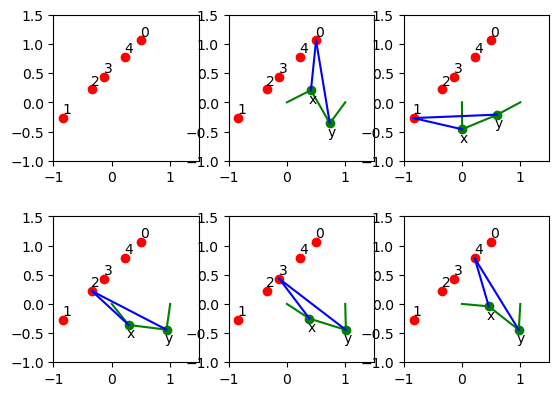

In [19]:
show4bar()

In [20]:
for sol in sols:
    agl = angles(sol)
    if agl != None:
        (x1v, x2v) = (sol['x1'].real, sol['x2'].real)
        (y1v, y2v) = (sol['y1'].real, sol['y2'].real)
        print('x = ', x1v, x2v)
        print('y = ', y1v, y2v)

1.4473421375642728 0.9284137081314461 0.75169921110931 0.3871162822082786 ordered angles
x =  -0.0877960434509405 -0.85138690751564
y =  0.235837391307302 -1.41899202703639
5.771983513802544 3.9629563185486125 3.442223836627024 0.5242754656511442 ordered angles
x =  0.676178657404253 -0.613650952963839
y =  0.356055523659319 0.310794500797803
2.524711332238134 0.9038272905536041 0.7498546795650226 0.38277375732994035 ordered angles
x =  -0.0801573081756838 -0.855275240173407
y =  -0.297321862562434 -2.18414388671793


Observe that one of the lists of ordered angles is used in the `showbar()`.

## 4. The Coupler Curve

The coupler curve is the curve drawn by the coupler point.

In [21]:
def plotpoints2(points):
    """
    Plots the precision points and the pivots.
    """
    xpt = [a for (a, b) in points]
    ypt = [b for (a, b) in points]
    plt.plot(xpt, ypt, 'ro')
    plt.text(xpt[0] + 0.01, ypt[0] + 0.06, "0")
    plt.text(xpt[1] - 0.03, ypt[1] + 0.06, "1")
    plt.text(xpt[2] - 0.01, ypt[2] + 0.06, "2")
    plt.text(xpt[3] - 0.01, ypt[3] + 0.06, "3")
    plt.text(xpt[4] - 0.01, ypt[4] + 0.06, "4")
    plt.plot([0, 1], [0, 0], 'w^') # pivots marked by white triangles
    plt.axis([-1.2, 1.2, -1.0, 1.5])

In [22]:
def plotbar2(fig, points, idx, x, y):
    """
    Plots a 4-bar with coordinates given in x and y,
    and the five precision points in the list points.
    The index idx is the position with respect to a point in points.
    """
    plotpoints2(points)
    xpt = [a for (a, b) in points]
    ypt = [b for (a, b) in points]
    (xp0, xp1) = (x[0] + xpt[0], x[1] + ypt[0])
    (yp0, yp1) = (y[0] + xpt[0], y[1] + ypt[0])
    if idx >= 0:
        (xp0, xp1) = (x[0] + xpt[idx], x[1] + ypt[idx])
        (yp0, yp1) = (y[0] + xpt[idx], y[1] + ypt[idx])
        plt.plot([xp0, yp0], [xp1, yp1], 'go')
        plt.plot([xp0, yp0], [xp1, yp1], 'g')
        plt.text(xp0 - 0.04, xp1 - 0.12, "x")
        plt.text(yp0 - 0.04, yp1 - 0.12, "y")
        plt.plot([0, xp0], [0, xp1], 'g')
        plt.plot([yp0, 1], [yp1, 0], 'g')
        plt.plot([xp0, xpt[idx]], [xp1, ypt[idx]], 'b')
        plt.plot([yp0, xpt[idx]], [yp1, ypt[idx]], 'b')

In [23]:
def lenbar(pt0, x, y):
    """
    In pt0 are the coordinates of the first precision point
    and in x and y the coordinates of the solution design.
    Returns the length of the bar between x and y.
    """
    (xp0, xp1) = (x[0] + pt0[0], x[1] + pt0[1])
    (yp0, yp1) = (y[0] + pt0[0], y[1] + pt0[1])
    result = sqrt((xp0 - yp0)**2 + (xp1 - yp1)**2)
    return result

In [24]:
def coupler(x, y, xr, yr):
    """
    In x and y are the coordinates of the solution design.
    In xr and yr are the distances to the coupler point.
    Computes the intersection between two circles, centered
    at x and y, with respective radii in xr and yr.
    """
    A = -2*x[0] + 2*y[0]
    B = -2*x[1] + 2*y[1]
    C = x[0]**2 + x[1]**2 - xr**2 - y[0]**2 - y[1]**2 + yr**2
    fail = True
    if A + 1.0 != 1.0: # eliminate z1
        (alpha, beta) = (-C/A, -B/A)
        a = beta**2 + 1 
        b = 2*alpha*beta - 2*x[1] - 2*x[0]*beta
        c = alpha**2 + x[0]**2 + x[1]**2 - xr**2 - 2*x[0]*alpha
        if b**2 - 4*a*c >= 0:
            fail = False
            disc = sqrt(b**2 - 4*a*c)
            z2 = (-b + disc)/(2*a)
            z1 = alpha + beta*z2
    if fail:
        (alpha, beta) = (-C/B, -A/B)
        a = beta**2 + 1 
        b = 2*alpha*beta - 2*y[1] - 2*y[0]*beta
        c = alpha**2 + y[0]**2 + y[1]**2 - yr**2 - 2*y[0]*alpha
        disc = sqrt(b**2 - 4*a*c)
        z1 = (-b + disc)/(2*a)
        z2 = alpha + beta*z1
        dxz = sqrt((x[0]-z1)**2 + (x[1]-z2)**2)
    return (z1, z2)

In [25]:
def xcrank(pt0, x):
    """
    In pt0 are the coordinates of the first precision point
    and in x the coordinates of the solution design.
    This function computes the length of the crank
    and its initial angle with respect to the first point.
    """
    from math import atan
    (xp0, xp1) = (x[0] + pt0[0], x[1] + pt0[1])
    crklen = sqrt(xp0**2 + xp1**2)
    crkagl = atan(xp1/xp0)
    return (crklen, crkagl)

In [26]:
def ycrank(pt0, y):
    """
    In pt0 are the coordinates of the first precision point
    and in y the coordinates of the solution design.
    This function computes the length of the crank
    and its initial angle with respect to the first point.
    """
    from math import cos, sin, acos, pi
    (yp0, yp1) = (y[0] + pt0[0], y[1] + pt0[1])
    crklen = sqrt((yp0 - 1)**2 + yp1**2)
    crkagl = acos((yp0-1)/crklen)
    if yp1 < 0:
        dlt = pi - crkagl
        crkagl = pi + dlt
    cx = 1 + crklen*cos(crkagl)
    cy = crklen*sin(crkagl)
    return (crklen, crkagl)

In [27]:
def xpos(y1, y2, dxy, rad):
    """
    Given in y1 and y2 are the coordinates of the point y,
    in dxy is the distance between the points x and y,
    and rad is the distance between x and (1, 0).
    The coordinates of the point x are returned in a tuple.
    """
    A = -2*y1  # coefficient with y1
    B = -2*y2  # coefficient with y2
    C = y1**2 + y2**2 - dxy**2 + rad**2 # constant
    fail = True
    if abs(y2) < 1.0e-8:
        x1 = -C/A
        x2sqr = rad**2 - x1**2
        x2 = sqrt(x2sqr)
        fail = False
    else: # eliminate x2
        (alpha, beta) = (-C/B, -A/B)
        (a, b, c) = (1+beta**2, 2*alpha*beta, alpha**2 - rad**2) 
        b4ac = b**2 - 4*a*c
        disc = sqrt(b4ac)
        x1m = (-b - disc)/(2*a)
        x2m = alpha + beta*x1m
        x1p = (-b + disc)/(2*a)
        x2p = alpha + beta*x1p
    return ((x1m, x2m), (x1p, x2p))

In [28]:
def plotcrank(crk, agl, dxy, rad, xrd, yrd):
    """
    Plots several positions of the crank.  On input are:
    crk : length of the crank from the point y to (1, 0),
    agl : start angle,
    rad : length of the crank from (0, 0) to the point x,
    xrd : length from the point x to the coupler point,
    yrd : length from the point y to the coupler point.
    """
    from math import sin, cos, pi
    (xzm, yzm) = ([], [])
    (xzp, yzp) = ([], [])
    nbr = 205
    inc = (pi+0.11763)/nbr
    b = agl - 2.558 # 125
    for k in range(nbr):
        (y1, y2) = (1 + crk*cos(b), crk*sin(b))
        (xm, xp) = xpos(y1, y2, dxy, rad)
        (x1m, x2m) = xm 
        (x1p, x2p) = xp
        (z1m, z2m) = coupler([x1m, x2m], [y1, y2], xrd, yrd)
        (z1p, z2p) = coupler([x1p, x2p], [y1, y2], xrd, yrd)
        xzm.append(z1m)
        yzm.append(z2m)
        xzp.append(z1p)
        yzp.append(z2p)
        if k < 0: # selective plot
            plt.plot([0, x1m], [0, x2m], 'g')
            plt.plot([x1m, y1], [x2m, y2], 'g')
            plt.plot([y1, 1], [y2, 0], 'g')
            dyp = sqrt((y1-1)**2 + y2**2)
            dyx = sqrt((x1m-y1)**2 + (x2m-y2)**2)
            print('dxy =', dxy, 'dyp =', dyp)
        if k < 0:
            print('y2 =', y2)
            plt.plot([x1m, z1m], [x2m, z2m], 'b')
            plt.plot([y1, z1m], [y2, z2m], 'b')
            plt.plot([x1p, z1p], [x2p, z2p], 'b')
            plt.plot([y1, z1p], [y2, z2p], 'b')
        b = b + inc
    plt.plot(xzp[:1]+xzm[:102]+xzp[102:], \
             yzp[:1]+yzm[:102]+yzp[102:], 'r')
    plt.plot(xzp[:102]+xzm[102:], yzp[:102]+yzm[102:], 'r')

In [29]:
def plotcoupler():
    """
    Plots the coupler curve for a straight line 4-bar mechanism.
    """
    pt0 = ( 0.50,  1.06)
    pt1 = (-0.83, -0.27)
    pt2 = (-0.34,  0.22)
    pt3 = (-0.13,  0.43)
    pt4 = ( 0.22,  0.78)
    points = [pt0, pt1, pt2, pt3, pt4]
    ags = [1.44734213756, 0.928413708131, 0.751699211109, 0.387116282208]
    x =  (-0.0877960434509, -0.851386907516)
    y =  (0.235837391307, -1.41899202704)
    (xcrk, xagl) = xcrank(pt0, x)
    (ycrk, yagl) = ycrank(pt0, y)
    dxy = lenbar(pt0, x, y) 
    fig = plt.figure()
    fig.add_subplot(111, aspect='equal')
    xrd = sqrt(x[0]**2 + x[1]**2) # distance from x to pt0
    yrd = sqrt(y[0]**2 + y[1]**2) # distance from y to pt0
    plotcrank(ycrk, yagl, dxy, xcrk, xrd, yrd)
    plotbar2(fig, points, 0, x, y)
    fig.canvas.draw()
    plt.savefig('fourbarfig2')

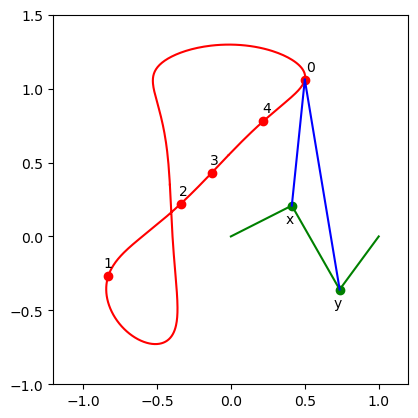

In [30]:
plotcoupler()